In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import datasets

In [ ]:
!nvidia-smi

Mon Jan 29 10:47:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

## importing Food101 Datset
* The Food-101 is a challenging data set of 101 food categories with 101,000 images. For each class, 250 manually reviewed test images are provided as well as 750 training images. On purpose, the training images were not cleaned, and thus still contain some amount of noise. This comes mostly in the form of intense colors and sometimes wrong labels. All images were rescaled to have a maximum side length of 512 pixels.

In [ ]:
from torchvision import datasets
from torchvision.datasets import Food101

In [ ]:
train_data = datasets.Food101(root= "data", split = 'train',
                              transform= None,
                              target_transform = None, download = True)

In [ ]:
test_data = datasets.Food101(root= "data", split = 'test',
                              transform= None,
                              target_transform = None, download = True)

## visualising train data

In [ ]:
import matplotlib.pyplot as plt

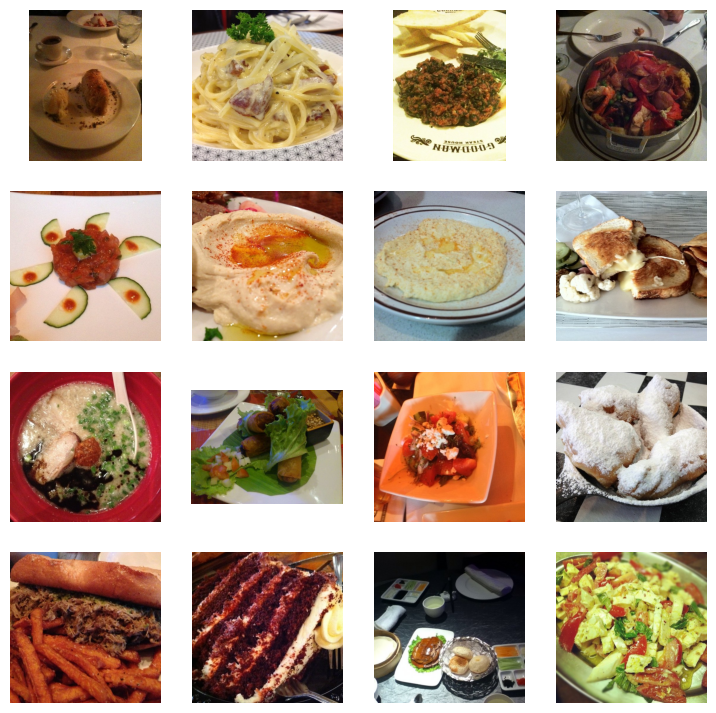

In [ ]:
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  #print(i)
  rand_idx = torch.randint(0,len(train_data), size=[1]).item()
  img,label = train_data[rand_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img)
  plt.axis(False)


## visualizing test data

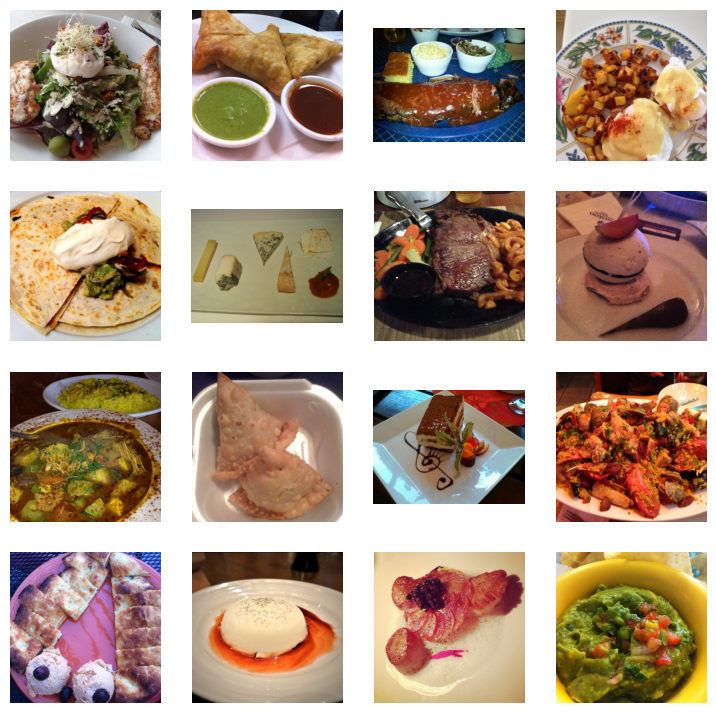

In [ ]:
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  #print(i)
  rand_idx = torch.randint(0,len(test_data), size=[1]).item()
  img,label = test_data[rand_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img)
  plt.axis(False)


## importing EffnetB2
* EfficientNet B2 model architecture from the EfficientNet: "Rethinking Model Scaling for Convolutional Neural Networks paper."

In [ ]:
from torchvision.models import efficientnet_b2
from torchvision import transforms

In [ ]:
weights= torchvision.models.EfficientNet_B2_Weights.DEFAULT

In [ ]:
auto_transform = weights.transforms()

## Creating dataloader using auto transform

In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader

### Data --> Transformed data --> Dataloader

In [ ]:
train_data_tranfom = datasets.ImageFolder(root = train_data,transform= auto_transform)

TypeError: scandir: path should be string, bytes, os.PathLike, integer or None, not Food101